<a href="https://colab.research.google.com/github/hongo-daisuke/study-python/blob/master/python_config_logging_mail_optparse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## configparser

*   ini形式の設定ファイルを使用する

```
; iniファイルの例
[DEFAULT]
debug = False

[DB]
host = 127.0.0.1
port = 3306
user = db_user
password = password
```





In [6]:
import configparser
config = configparser.ConfigParser()

# 格項目の設定
config['debug'] = {
    'debug': True
}
config['DB'] = {
    'host': '127.0.0.1',
    'port': 3306,
    'user': 'db_user',
    'password': 'db_password'
}

# configファイルへの書き込み
with open('conig.ini', 'w') as config_file:
    config.write(config_file)

In [7]:
# configファイルの読み込み

config = configparser.ConfigParser()
config.read('conig.ini')
config_db_host = config['DB']['host']
config_db_port = config['DB']['port']
print(config_db_host)
print(config_db_port)

127.0.0.1
3306


## yaml
```
default:
    debug: False

db:
    host: 127.0.0.1
    port: 3306
    user: db_user
    password: db_password
```



In [8]:
import yaml

# yamlファイルに書き込み
with open('config.yml', 'w') as yaml_file:
    yaml.dump({
        'db': {
            'host': '127.0.0.1',
            'port': 3306,
            'user': 'db_user',
            'password': 'db_password'
        },
        'default': {
            'debug': True
        }
    }, yaml_file, default_flow_style=False)

In [9]:
# yamlファイルの読み込み
with open('config.yml', 'r') as yaml_file:
    data = yaml.safe_load(yaml_file)
    print(data)
    print(data['db']['password'])

{'db': {'host': '127.0.0.1', 'password': 'db_password', 'port': 3306, 'user': 'db_user'}, 'default': {'debug': True}}
db_password


## ロギング

*   ログを出力する
*   ログレベルは以下の通り
1.   DEBUG
2.   INFO
3.   WARNING
4.   ERROR
5.   CRITICAL

```
# ロギング設定例

# ログの設定
logging.basicConfig(format='フォーマット文字列', filename=エラーログファイル名, level=logging.ログレベル)

# ロガーの取得
logger = logging.getLogger('logger名')

# ログ出力例
logger.info('info')
```





In [48]:
import logging

# levelに設定しているレベル以下ログは出力されない
logging.basicConfig(level=logging.INFO)

logging.debug('debug')
logging.info('info')
logging.warning('warning')
logging.error('error')
logging.critical('critical')

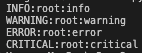

In [50]:
# 文字の代入のやり方は複数ある
logging.warning('warning　%s %s' % ('test1', 'test2'))
logging.warning('warning　%s %s', 'test1', 'test2')

In [52]:
# ログをファイルを書き込む
import logging

# basicConfigの引数にfilenameを追加する
logging.basicConfig(filename='my_error.log', level=logging.INFO)
logging.warning('warning　%s %s', 'test1', 'test2')

### ロギングのフォーマット
*   basicConfigの引数formatにフォーマット文字列をしているすることで、ログのフォーマットを設定可能
```
%(name)s : logger名
%(levelno)s : ログレベル番号
%(levelname)s : ログレベル名
%(pathname)s : ソースファイルのフルパス
%(filename)s : ソースファイル名
%(module)s : モジュール名
%(lineno)d : 行数
%(funcName)s : 関数、メソッド名
%(asctime)s : LogREcordが作成された時間
%(thread)d : スレッドID
%(threadName)s : スレッド名
%(process)d : プロセスID
%(message)s : メッセージ
```



In [54]:
import logging

format = '%(asctime)s:%(filename)s:%(levelname)s:%(message)s'
logging.basicConfig(format=format, level=logging.INFO)

logging.info('%s %s', 'test1', 'test2')

スクリーンショット 2022-09-01 22.52.43.png

### ロガーの設定


```
# ロガーの生成例
logger = logging.getLogger(__name__)
```



In [55]:
import logging

logging.basicConfig(level=logging.INFO)

logging.info('info')

logger = logging.getLogger('__name__')
logger.setLevel(logging.DEBUG)
logger.debug('info')

DEBUG:__name__:info


### ハンドラの設定
*   コンソールにもファイルにも出力する

```
# ロガーの設定
logger = logging.getLogger('__name__')

# ハンドラの設定
h = logging.FileHandler('logtest.log')
logger.addHandler(h)
```



In [60]:
import logging
logger = logging.getLogger('__name__')
logger.setLevel(logging.DEBUG)

# ハンドラの設定
h = logging.FileHandler('logtest.log')
logger.addHandler(h)

logger.debug('logger debug')
logger.info('logger info')
logger.warning('logger warning')

# logtest.logが生成される

DEBUG:__name__:logger debug
INFO:__name__:logger info


### ロギングのコンフィグ

In [67]:
import configparser
config = configparser.ConfigParser()

# Loggerの種類
config['loggers'] = {
    'keys':'root,simpleExample'
}
# ハンドラの設定
config['handlers'] = {
    'keys':'streamHandler'
}

# フォーマットの設定
config['formatters'] = {
    'keys':'formatter'
}

# root loggerの設定
config['logger_root'] = {
    'level':'WARNING',
    'handlers':'streamHandler',
}

# simpleExample loggerの設定
config['logger_simpleExample'] = {
    'level':'DEBUG',
    'handlers':'streamHandler',
    'qualname':'simpleExample',
    'propagate':0
}

# ハンドラの詳細設定
config['handler_streamHandler'] = {
    'class':'StreamHandler',
    'level':'DEBUG',
    'formatter':'formatter',
    'args':'(sys.stderr, )',
}

# フォーマットの詳細設定
config['formatter_formatter'] = {
    'format':'%(asctime)s:%(filename)s:%(levelname)s:%(message)s'
}

# configファイルへの書き込み
with open('logging.ini', 'w') as config_file:
    config.write(config_file)

In [71]:
import logging.config

logging.config.fileConfig('logging.ini')
logger = logging.getLogger(__name__)

logger.debug('debug message')
logger.info('info message')
logger.warning('warning message')
logger.error('error message')
logger.critical('critical message')

In [ ]:
import logging.config

logging.config.fileConfig('logging.ini')
logger = logging.getLogger('simpleExample')

logger.debug('debug message')
logger.info('info message')
logger.warning('warning message')
logger.error('error message')
logger.critical('critical message')

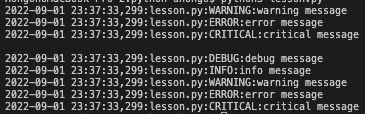

In [ ]:
# 辞書型での設定
import logging.config
logging.config.dictConfig({
    'version': 1,
    # フォーマットの設定
    'formatters': {
        'sampleormatter': {
            'format': '%(asctime)s:%(filename)s:%(levelname)s:%(message)s'
        }
    },
    # ハンドラの設定
    'handlers': {
        'sampleHandlers': {
            'class': 'logging.StreamHandler',
            'formatter': 'sampleormatter',
            'level': logging.DEBUG
        }
    },
    # root loggerの設定
    'root': {
        'handlers': ['sampleHandlers'],
        'level': logging.WARNING,
    },
    # Loggerの設定
    'loggers': {
        'simpleExample': {
            'handlers': ['sampleHandlers'],
            'level': logging.DEBUG,
            'propagate': 0
        }
    }
})

logger = logging.getLogger(__name__)
logger.debug('debug message')
logger.info('info message')
logger.warning('warning message')
logger.error('error message')
logger.critical('critical message')

print('')

logger = logging.getLogger('simpleExample')
logger.debug('debug message')
logger.info('info message')
logger.warning('warning message')
logger.error('error message')
logger.critical('critical message')

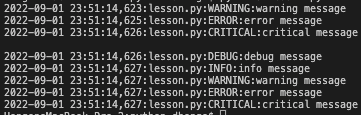

### ロギングの書き方

In [74]:
import logging

logger = logging.getLogger(__name__)

logger.error('Api call is failed')

# 辞書型でエラーを出力
logger.error({
    'action': 'create',
    'status': 'fail',
    'message': 'Api call is failed'
})

## メールの送信

*   Gmailを送信する



In [ ]:
from email import message
import smtplib

smtp_host = 'smtp.gmail.com'
smtp_port = 587
from_email = 'XXX' # 送信元アドレス
to_email = 'XXX' # 送信先アドレス
username = 'XXX' # Gアカウントのアドレス
password = 'XXX' # Gアカウントのパスワード

msg = message.EmailMessage()
msg.set_content('Test mail')
msg['Subject'] = 'Test mail subject'
msg['From'] = from_email
msg['To'] = to_email

# メッセージをメールサーバーへ送る
server = smtplib.SMTP(smtp_host, smtp_port)

# メールサーバーとコネクション
server.ehlo()
server.starttls()
server.ehlo()

# ログインを行う
server.login(username, password)

server.send_message(msg)
server.quit()


## 添付ファイル付きのメールを送信

In [ ]:
from email.mime import multipart
from email.mime import text
import smtplib

smtp_host = 'smtp.gmail.com'
smtp_port = 587
from_email = 'XXX' # 送信元アドレス
to_email = 'XXX' # 送信先アドレス
username = 'XXX' # Gアカウントのアドレス
password = 'XXX' # Gアカウントのパスワード

msg = multipart.MIMEMultipart()
msg['Subject'] = 'Test mail subject'
msg['From'] = from_email
msg['To'] = to_email
msg.attach(text.MIMEText('テストメール', 'plain'))
with open('test.txt', 'r') as f:
    attachment = text.MIMEText(f.read(), 'plain')
    # 規格の設定
    attachment.add_header(
        'Content-Disposition', 'attachment',
        filename='test.txt'
    )
    msg.attach(attachment)

# メッセージをメールサーバーへ送る
server = smtplib.SMTP(smtp_host, smtp_port)

# メールサーバーとコネクション
server.ehlo()
server.starttls()
server.ehlo()

# ログインを行う
server.login(username, password)

server.send_message(msg)
server.quit()


## SMTPハンドラーでログをEmail送信

In [ ]:
import logging
import logging.handlers

smtp_host = 'smtp.gmail.com'
smtp_port = 587
from_email = 'XXX' # 送信元アドレス
to_email = 'XXX' # 送信先アドレス
username = 'XXX' # Gアカウントのアドレス
password = 'XXX' # Gアカウントのパスワード

logger = logging.getLogger('mail')
logger.setLevel(logging.CRITICAL)

# ハンドラの設定
logger.addHandler(logging.handlers.SMTPHandler(
    (smtp_host, smtp_port), from_email, to_email,
    subject='test log', credentials=(username, password),
    secure=(None, None, None),
    timeout=20
))

logger.critical('logger critical')

## optparse

*   コマンドラインの引数を高機能で設定する



### 引数がファイル

In [ ]:
from optparse import OptionParser

def main():
    usage = 'usage: %prog [options] arg1 arg2'
    parser = OptionParser(usage=usage)
    # ファイルを受け取る
    parser.add_option('-f', '--file', action='store', type='string',
                      dest='filename', help='File name')
    options, args = parser.parse_args()
    print(options)
    print(options.filename)
    print(args)

if __name__ == '__main__':
    main()

`python3 lesson.py -f test.txt a b`

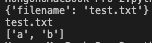

### 引数が数値

In [ ]:
from optparse import OptionParser

def main():
    usage = 'usage: %prog [options] arg1 arg2'
    parser = OptionParser(usage=usage)
    parser.add_option('-n', '--num', action='store', type='int', dest='num')
    options, args = parser.parse_args()
    print(options)
    print(options.num)
    print(args)

if __name__ == '__main__':
    main()

`python3 lesson.py --num=20`

`python3 lesson.py -n 20`

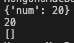

In [ ]:
from optparse import OptionParser

def main():
    usage = 'usage: %prog [options] arg1 arg2'
    parser = OptionParser(usage=usage)
    parser.add_option('-f', '--file', action='store', type='string',
                      dest='filename', help='File name')
    parser.add_option('-n', '--num', action='store', type='int', dest='num')
    options, args = parser.parse_args()
    print(options)
    print(options.num)
    print(args)

if __name__ == '__main__':
    main()

`python3 lesson.py --help`
`python3 lesson.py -h`

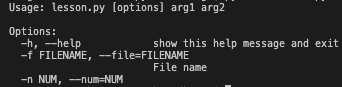


## store_trueとstore_false

In [ ]:
from optparse import OptionParser

def main():
    usage = 'usage: %prog [options] arg1 arg2'
    parser = OptionParser(usage=usage)
    parser.add_option('-f', '--file', action='store', type='string',
                      dest='filename', help='File name')
    parser.add_option('-n', '--num', action='store', type='int', dest='num')
    
    # dest='verbose'のデフォルト値をTrueにする
    parser.set_defaults(verbose=True)
    
    # action='store_true'や'store_false'でbool値を設定可能
    parser.add_option('-v', action='store_true', dest='verbose')
    #parser.add_option('-v', action='store_false', dest='verbose', default=True)
    parser.add_option('-q', action='store_false', dest='verbose')
    options, args = parser.parse_args()
    print(options)
    print(args)

if __name__ == '__main__':
    main()

```
# parser.set_defaults(verbose=True)なのでデフォルトはTrueになる
# set_defaultsがないとNoneになる
python3 lesson.py
{'filename': None, 'num': None, 'verbose': True}
[]

# action='store_true'
python3 lesson.py -v
{'filename': None, 'num': None, 'verbose': True}
[]

# action='store_false'
python3 lesson.py -q
{'filename': None, 'num': None, 'verbose': False}
[]
```




### コールバック

In [ ]:
from optparse import OptionParser

def main():
    usage = 'usage: %prog [options] arg1 arg2'
    parser = OptionParser(usage=usage)
    parser.add_option('-f', '--file', action='store', type='string',
                      dest='filename', help='File name')
    parser.add_option('-n', '--num', action='store', type='int', dest='num')
    parser.set_defaults(verbose=True)
    parser.add_option('-v', action='store_true', dest='verbose')
    #parser.add_option('-v', action='store_false', dest='verbose', default=True)
    parser.add_option('-q', action='store_false', dest='verbose')


    parser.add_option('-e', dest='env')

    def is_relase(option, opt_str, value, parser):
        # -e(env)の引数がprdの場合はエラーを発生させる
        if parser.values.env == 'prd':
            raise parser.error('No release')
        setattr(parser.values, option.dest, True) # --releaseにTrueをセットする

    # actionにcallbackを設定しcallbackにはfunctionを設定する
    parser.add_option('--release', action='callback', callback=is_relase, dest='release')


    options, args = parser.parse_args()
    print(options)
    print(args)

if __name__ == '__main__':
    main()

```
python3 lesson.py --release
{'filename': None, 'num': None, 'verbose': True, 'env': None, 'release': True}
[]

# -eがprdの場合はエラー
python3 lesson.py -e prd --release
Usage: lesson.py [options] arg1 arg2

lesson.py: error: No release

# -eがprd以外はエラーにならず、releaseにTrueが設定される
python3 lesson.py -e dev --release
{'filename': None, 'num': None, 'verbose': True, 'env': 'dev', 'release': True}
[]
```



### helpの書き方

In [ ]:
from optparse import OptionParser
from optparse import OptionGroup

def main():
    usage = 'usage: %prog [options] arg1 arg2'
    parser = OptionParser(usage=usage)
    parser.add_option('-f', '--file', action='store', type='string',
                      dest='filename', help='File name')
    parser.add_option('-n', '--num', action='store', type='int', dest='num')
    parser.set_defaults(verbose=True)
    parser.add_option('-v', action='store_true', dest='verbose')
    #parser.add_option('-v', action='store_false', dest='verbose', default=True)
    parser.add_option('-q', action='store_false', dest='verbose')
    parser.add_option('-e', dest='env')
    def is_relase(option, opt_str, value, parser):
        if parser.values.env == 'prd':
            raise parser.error('No release')
        setattr(parser.values, option.dest, True)
    parser.add_option('--release', action='callback', callback=is_relase, dest='release')

    groupe = OptionGroup(parser, 'Dangerous options')
    groupe.add_option('-g', action='store_true', help='Group option')
    parser.add_option_group(groupe)

    options, args = parser.parse_args()
    print(options)
    print(args)

if __name__ == '__main__':
    main()

```
python3 lesson.py -h
Usage: lesson.py [options] arg1 arg2

Options:
  -h, --help            show this help message and exit
  -f FILENAME, --file=FILENAME
                        File name
  -n NUM, --num=NUM     
  -v                    
  -q                    
  -e ENV                
  --release             

  Dangerous options:
    -g                  Group option


# 引数の設定も可能
python3 lesson.py -g
{'filename': None, 'num': None, 'verbose': True, 'env': None, 'release': None, 'g': True}
[]
```

